In [64]:
import warnings
warnings.filterwarnings("ignore")

In [65]:
# import Dependencies 
import warnings
warnings.filterwarnings("ignore")
# import Dependencies 
import sqlalchemy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [66]:
# Import Data

dbEngine=sqlalchemy.create_engine('sqlite:///finalproject2.0.db')

vgd_df = pd.read_sql('select * from Video_Games_Sales',dbEngine)

In [67]:
# Display Data 
vgd_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37


In [69]:
vgd_df.Platform.unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'PS4', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne', 'GC',
       'WiiU', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [70]:
# Inspecting the data
vgd_df.shape

(16598, 11)

In [71]:
vgd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          16598 non-null  object
 1   Name          16598 non-null  object
 2   Platform      16598 non-null  object
 3   Year          16598 non-null  object
 4   Genre         16598 non-null  object
 5   Publisher     16598 non-null  object
 6   NA_Sales      16598 non-null  object
 7   EU_Sales      16598 non-null  object
 8   JP_Sales      16598 non-null  object
 9   Other_Sales   16598 non-null  object
 10  Global_Sales  16598 non-null  object
dtypes: object(11)
memory usage: 1.4+ MB


In [72]:
vgd_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1,31.37


In [73]:
vgd_df.drop(columns=['Other_Sales'])

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,33
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0,0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0,0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0,0,0,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0,0.01,0,0.01


In [74]:
vgd_df['NA_Sales'] = pd.to_numeric(vgd_df['NA_Sales'], errors='coerce')

In [75]:
vgd_df['EU_Sales'] = pd.to_numeric(vgd_df['EU_Sales'], errors='coerce')

In [76]:
vgd_df['JP_Sales'] = pd.to_numeric(vgd_df['JP_Sales'], errors='coerce')

In [77]:
vgd_df['Global_Sales'] = pd.to_numeric(vgd_df['Global_Sales'], errors='coerce')

In [79]:
values = ['NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'GC', 'Wii',
        'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX']
values2 = ['Wii']

In [80]:
#drop rows that contain any value in the list
vgd_df = vgd_df[vgd_df.Platform.isin (values) == False]
vgd_df = vgd_df[vgd_df.Platform.isin (values2) == False]

In [81]:
vgd_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
44,45,Grand Theft Auto V,PS4,2014,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
77,78,FIFA 16,PS4,2015,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,2.93,3.29,0.22,1.23,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,2.80,3.30,0.14,1.37,7.60


In [82]:
vgd_df.Genre.unique()

array(['Shooter', 'Action', 'Sports', 'Racing', 'Role-Playing',
       'Platform', 'Fighting', 'Misc', 'Adventure', 'Puzzle', 'Strategy',
       'Simulation'], dtype=object)

In [86]:
vgd_df.drop(columns=['Rank','Publisher','Other_Sales'])

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Global_Sales
33,Call of Duty: Black Ops 3,PS4,2015,Shooter,5.77,5.81,0.35,14.24
44,Grand Theft Auto V,PS4,2014,Action,3.80,5.81,0.36,11.98
77,FIFA 16,PS4,2015,Sports,1.11,6.06,0.06,8.49
92,Star Wars Battlefront (2015),PS4,2015,Shooter,2.93,3.29,0.22,7.67
93,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.80,3.30,0.14,7.60
...,...,...,...,...,...,...,...,...
16550,God Eater Off Shot: Tachibana Sakuya-hen Twin ...,PS4,2016,Action,0.00,0.00,0.01,0.01
16562,Mighty No. 9,XOne,2016,Platform,0.01,0.00,0.00,0.01
16569,Resident Evil 4 HD,XOne,2016,Shooter,0.01,0.00,0.00,0.01
16570,Farming 2017 - The Simulation,PS4,2016,Simulation,0.00,0.01,0.00,0.01


In [87]:
vgd_df.Platform.unique()

array(['PS4', 'XOne', 'WiiU'], dtype=object)

In [88]:
vgd_df.describe()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
count,692.000000,692.000000,692.000000,692.000000
mean,0.315477,0.279740,0.039639,0.724017
std,0.592946,0.609838,0.121793,1.359550
min,0.000000,0.000000,0.000000,0.010000
25%,0.020000,0.020000,0.000000,0.060000
50%,0.095000,0.080000,0.000000,0.220000
75%,0.330000,0.250000,0.030000,0.680000
max,5.770000,6.060000,1.440000,14.240000


In [89]:
vgd_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 692 entries, 33 to 16576
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          692 non-null    object 
 1   Name          692 non-null    object 
 2   Platform      692 non-null    object 
 3   Year          692 non-null    object 
 4   Genre         692 non-null    object 
 5   Publisher     692 non-null    object 
 6   NA_Sales      692 non-null    float64
 7   EU_Sales      692 non-null    float64
 8   JP_Sales      692 non-null    float64
 9   Other_Sales   692 non-null    object 
 10  Global_Sales  692 non-null    float64
dtypes: float64(4), object(7)
memory usage: 64.9+ KB


In [91]:
# Examine data for Null variables

vgd_df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         Rank   Name  Platform   Year  Genre  Publisher  NA_Sales  EU_Sales  \
33     False  False     False  False  False      False     False     False   
44     False  False     False  False  False      False     False     False   
77     False  False     False  False  False      False     False     False   
92     False  False     False  False  False      False     False     False   
93     False  False     False  False  False      False     False     False   
...      ...    ...       ...    ...    ...        ...       ...       ...   
16550  False  False     False  False  False      False     False     False   
16562  False  False     False  False  False      False     False     False   
16569  False  False     False  False  False      False     False     False   
16570  False  False     False  False  False      False     False     False   
16576  False  False     False  False  False      False     False     False   

 

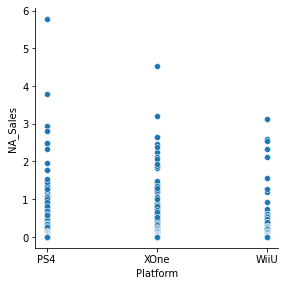

In [92]:
# NA Sales relationship to platform
sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='NA_Sales', height=4, aspect=1, kind='scatter')
plt.show()

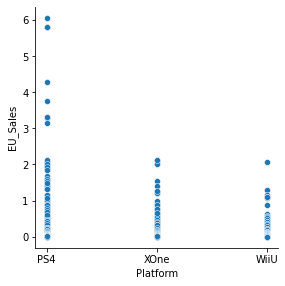

In [93]:
# EU sales relationship to platform

sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='EU_Sales', height=4, aspect=1, kind='scatter')
plt.show()

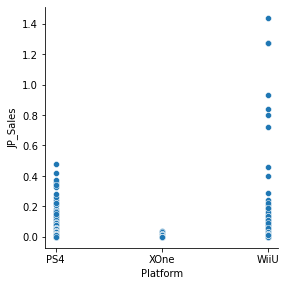

In [94]:
# Japan sales relationship to platform

sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='JP_Sales', height=4, aspect=1, kind='scatter')
plt.show()

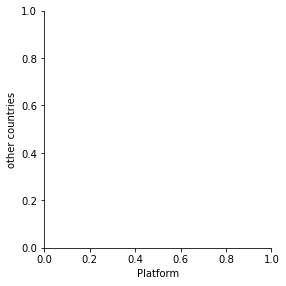

In [95]:
# Other Countries sales relationship to platform

sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='other countries', height=4, aspect=1, kind='Genre')
plt.show()

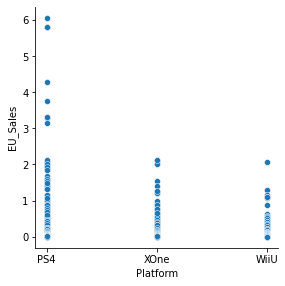

In [96]:
# EU sales relationship to platform

sns.pairplot(vgd_df, x_vars=['Platform'], y_vars='EU_Sales', height=4, aspect=1, kind='scatter')
plt.show()

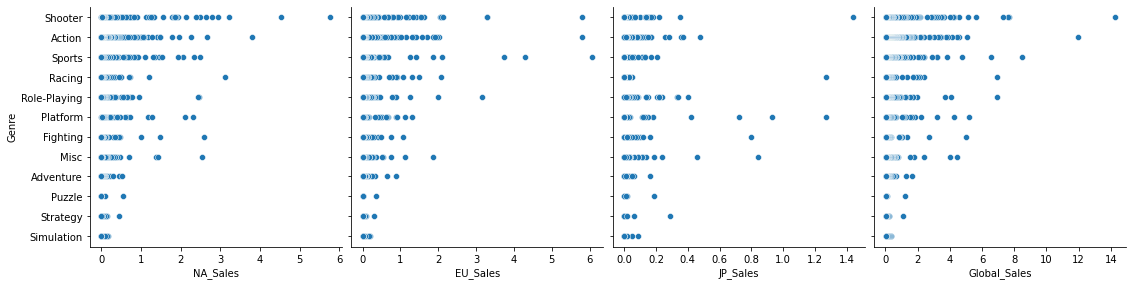

In [98]:

sns.pairplot(vgd_df, x_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales'], y_vars='Genre', height=4, aspect=1, kind='scatter')
plt.show()

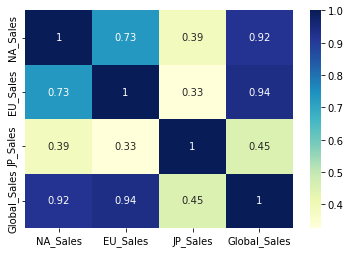

In [101]:
#relationship variables
sns.heatmap(vgd_df.corr(), cmap="YlGnBu", annot = True)
plt.show()

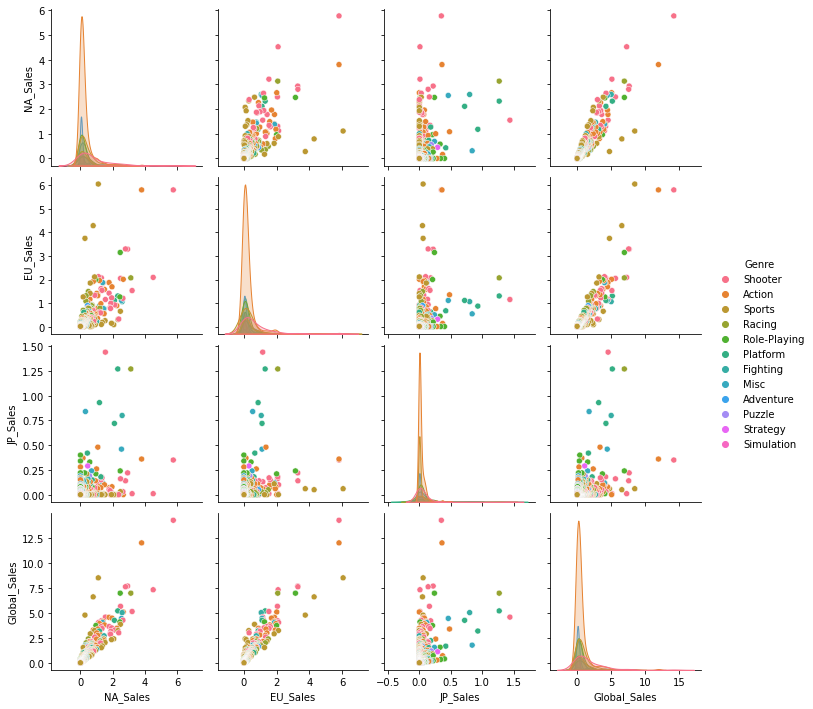

In [102]:
sns.pairplot(vgd_df,hue='Genre')

In [103]:
vgd_df.corr()

,NA_Sales,EU_Sales,JP_Sales,Global_Sales
NA_Sales,1.000000,0.730088,0.385641,0.916957
EU_Sales,0.730088,1.000000,0.327442,0.935122
JP_Sales,0.385641,0.327442,1.000000,0.451749
Global_Sales,0.916957,0.935122,0.451749,1.000000


In [100]:
#Linear Regression


In [104]:
X = vgd_df['Genre']
y = vgd_df['NA_Sales']

In [105]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
33,0,0,0,0,0,0,0,1,0,0,0
44,0,0,0,0,0,0,0,0,0,0,0
77,0,0,0,0,0,0,0,0,0,1,0
92,0,0,0,0,0,0,0,1,0,0,0
93,0,0,0,0,0,0,0,1,0,0,0


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [107]:

X_train.head()

,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
2701,0,0,0,0,0,0,0,0,0,1,0
15727,0,0,0,0,0,0,0,0,0,1,0
6157,0,1,0,0,0,0,0,0,0,0,0
16429,0,0,0,0,0,0,0,0,1,0,0
5807,0,0,0,1,0,0,0,0,0,0,0


In [108]:
y_train.head()


2701     0.09
15727    0.02
6157     0.19
16429    0.00
5807     0.22
Name: NA_Sales, dtype: float64

In [109]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(484, 11)
(208, 11)
(484,)
(208,)


In [110]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [111]:
# print the intercept
print(model.intercept_)

0.22912790697674434


In [112]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Adventure,-0.155378
Fighting,0.080072
Misc,0.072747
Platform,0.219963
Puzzle,-0.042461
Racing,0.078015
Role-Playing,0.022330
Shooter,0.575212
Simulation,-0.160556
Sports,0.188085


In [113]:
predictions = model.predict(X_test)
predictions

array([0.22912791, 0.22912791, 0.3092    , 0.22912791, 0.07375   ,
       0.22912791, 0.44909091, 0.22912791, 0.04      , 0.301875  ,
       0.41721311, 0.41721311, 0.22912791, 0.22912791, 0.30714286,
       0.80433962, 0.25145833, 0.22912791, 0.22912791, 0.22912791,
       0.80433962, 0.80433962, 0.301875  , 0.22912791, 0.22912791,
       0.22912791, 0.80433962, 0.41721311, 0.30714286, 0.30714286,
       0.41721311, 0.80433962, 0.25145833, 0.22912791, 0.22912791,
       0.301875  , 0.22912791, 0.44909091, 0.04      , 0.80433962,
       0.22912791, 0.41721311, 0.22912791, 0.22912791, 0.22912791,
       0.22912791, 0.22912791, 0.301875  , 0.22912791, 0.22912791,
       0.3092    , 0.07375   , 0.301875  , 0.41721311, 0.41721311,
       0.30714286, 0.22912791, 0.22912791, 0.07375   , 0.25145833,
       0.301875  , 0.41721311, 0.80433962, 0.22912791, 0.22912791,
       0.22912791, 0.41721311, 0.22912791, 0.22912791, 0.22912791,
       0.22912791, 0.30714286, 0.07375   , 0.07375   , 0.25145

<AxesSubplot:xlabel='NA_Sales'>

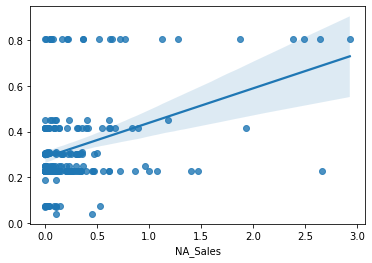

In [114]:
sns.regplot(y_test,predictions)

In [115]:
import statsmodels.api as sm
X_train_Sm= sm.add_constant(X_train)
X_train_Sm= sm.add_constant(X_train)
ls=sm.OLS(y_train,X_train_Sm).fit()
print(ls.summary())

                            OLS Regression Results                            
Dep. Variable:               NA_Sales   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     4.329
Date:                Wed, 21 Sep 2022   Prob (F-statistic):           3.52e-06
Time:                        19:24:08   Log-Likelihood:                -440.78
No. Observations:                 484   AIC:                             905.6
Df Residuals:                     472   BIC:                             955.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2291      0.046      4.933   